In [106]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,recall_score,confusion_matrix,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import datetime as dt
from datetime import datetime
import plotly.express as px
from scipy.optimize import linprog
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils

/tmp/ipykernel_6359/2704264910.py:26: DeprecationWarning:

Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.



In [108]:
df = pd.read_csv('supply_chain_data.csv')

In [109]:
df.shape

(100, 24)

In [110]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [111]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [113]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [114]:
np.sum(df.isna(), axis=0)

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns= lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [117]:
df.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

In [118]:
dc = df.copy()

In [119]:
le=preprocessing.LabelEncoder()
dc['product_type'] = le.fit_transform(dc['product_type'])
dc['customer_demographics']= le.fit_transform(dc['customer_demographics'])
dc['shipping_carriers']= le.fit_transform(dc['shipping_carriers'])
dc['location']= le.fit_transform(dc['location'])
dc['sku']= le.fit_transform(dc['sku'])
dc['inspection_results']= le.fit_transform(dc['inspection_results'])
dc['transportation_modes']= le.fit_transform(dc['transportation_modes'])
dc['routes']= le.fit_transform(dc['routes'])
dc['supplier_name']= le.fit_transform(dc['supplier_name'])


<Axes: >

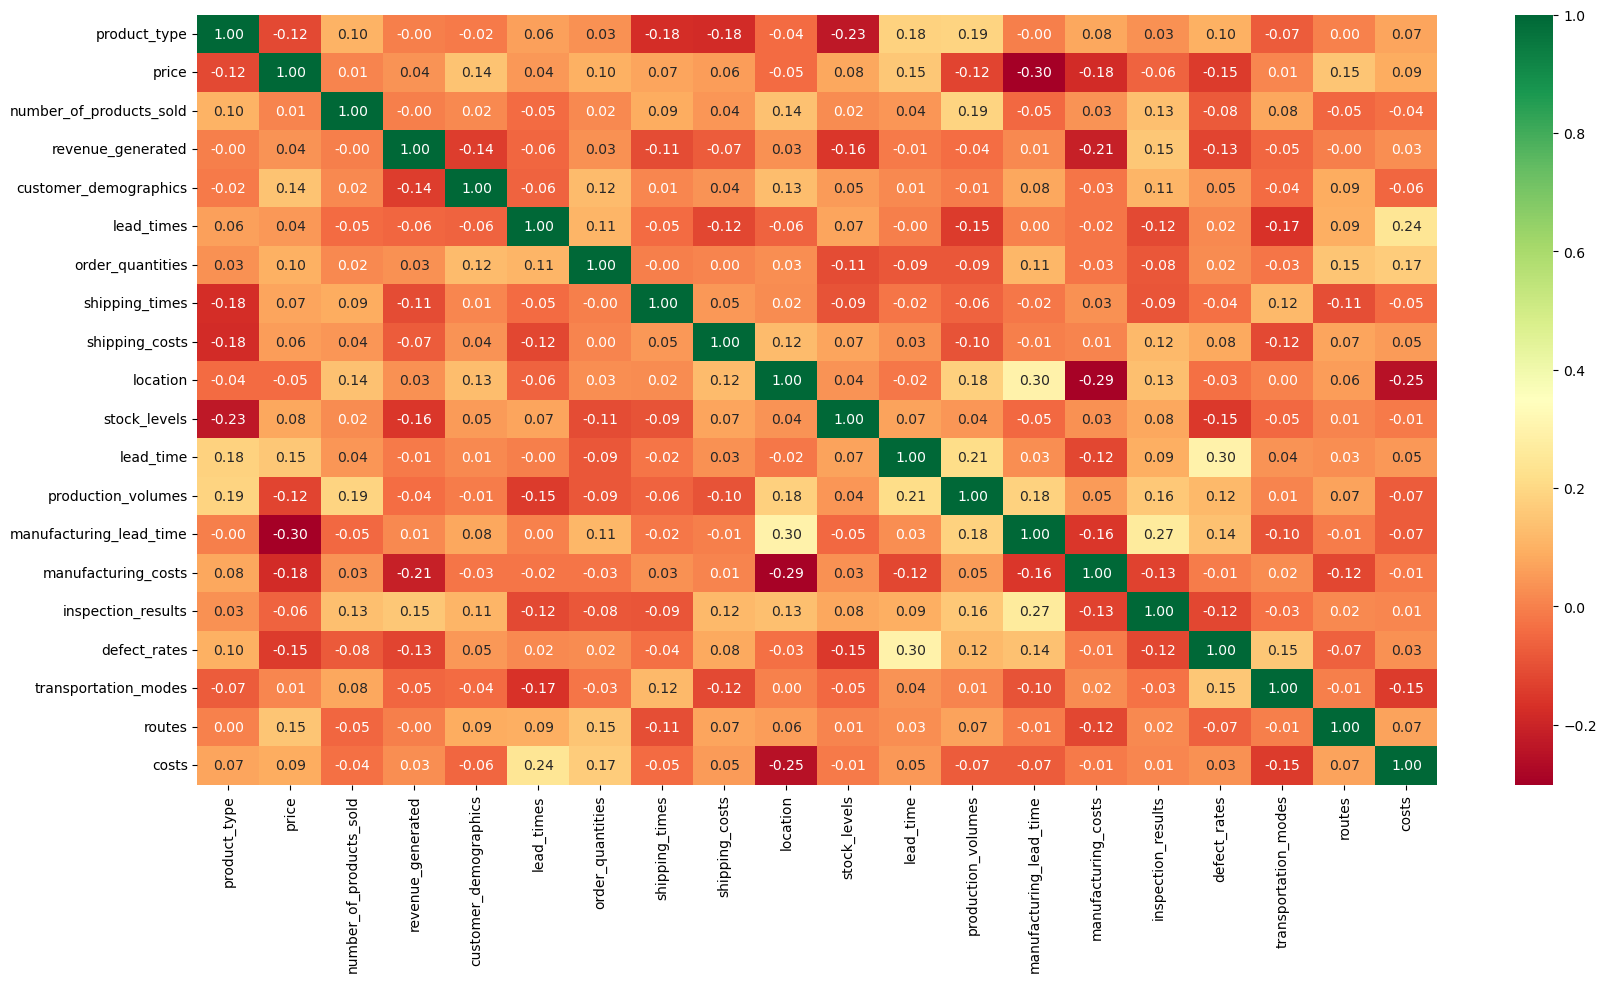

In [120]:
dc_features=dc[['product_type','price', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 
                'order_quantities', 'shipping_times', 'shipping_costs', 'location', 'stock_levels', 'lead_time', 'production_volumes', 
                'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'routes', 
                'costs']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(dc_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

In [121]:
stock=dc[['product_type','price', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities',
          'shipping_times', 'shipping_costs', 'location', 'stock_levels', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 
          'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'routes', 'costs']]

corr = stock.corr()

In [122]:
corr

,product_type,price,number_of_products_sold,revenue_generated,customer_demographics,lead_times,order_quantities,shipping_times,shipping_costs,location,stock_levels,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
product_type,1.000000,-0.118260,0.104189,-0.003482,-0.015001,0.063697,0.031378,-0.177486,-0.184026,-0.042242,-0.234523,0.182971,0.188841,-0.002508,0.077401,0.032807,0.099739,-0.073864,0.003619,0.070671
price,-0.118260,1.000000,0.005739,0.038424,0.141159,0.044855,0.095819,0.071942,0.058543,-0.045747,0.078261,0.152185,-0.124575,-0.301313,-0.184123,-0.060739,-0.147247,0.008989,0.149359,0.088501
number_of_products_sold,0.104189,0.005739,1.000000,-0.001641,0.015365,-0.046419,0.015992,0.087315,0.044285,0.139708,0.022189,0.041230,0.187945,-0.048939,0.034284,0.133273,-0.082726,0.075610,-0.053316,-0.036951
revenue_generated,-0.003482,0.038424,-0.001641,1.000000,-0.143585,-0.057296,0.029422,-0.109211,-0.072892,0.033924,-0.158480,-0.014178,-0.037441,0.014073,-0.214025,0.152314,-0.125335,-0.052785,-0.002071,0.027252
customer_demographics,-0.015001,0.141159,0.015365,-0.143585,1.000000,-0.062386,0.121561,0.009490,0.036614,0.127493,0.051869,0.014808,-0.007385,0.078132,-0.025202,0.107667,0.048838,-0.042649,0.088044,-0.056375
lead_times,0.063697,0.044855,-0.046419,-0.057296,-0.062386,1.000000,0.105459,-0.045156,-0.120746,-0.061358,0.072571,-0.002818,-0.145324,0.003364,-0.024441,-0.115951,0.015681,-0.169066,0.093482,0.243686
order_quantities,0.031378,0.095819,0.015992,0.029422,0.121561,0.105459,1.000000,-0.002561,0.004261,0.028195,-0.111455,-0.086189,-0.086567,0.112347,-0.026784,-0.083564,0.018986,-0.025173,0.148212,0.167306
shipping_times,-0.177486,0.071942,0.087315,-0.109211,0.009490,-0.045156,-0.002561,1.000000,0.045108,0.021345,-0.094883,-0.022214,-0.060470,-0.016953,0.029132,-0.091590,-0.036673,0.117325,-0.105624,-0.045541
shipping_costs,-0.184026,0.058543,0.044285,-0.072892,0.036614,-0.120746,0.004261,0.045108,1.000000,0.122660,0.072907,0.029680,-0.097979,-0.005653,0.005984,0.119656,0.083139,-0.116143,0.071578,0.051671
location,-0.042242,-0.045747,0.139708,0.033924,0.127493,-0.061358,0.028195,0.021345,0.122660,1.000000,0.038421,-0.016764,0.180902,0.295779,-0.293407,0.130888,-0.034786,0.001275,0.055300,-0.253995


In [123]:
Product = df.groupby('product_type') 
Route = df.groupby('routes')
Customer= df.groupby('customer_demographics')
Shipping= df.groupby('shipping_carriers')
Location= df.groupby('location')
Transportation= df.groupby('transportation_modes')

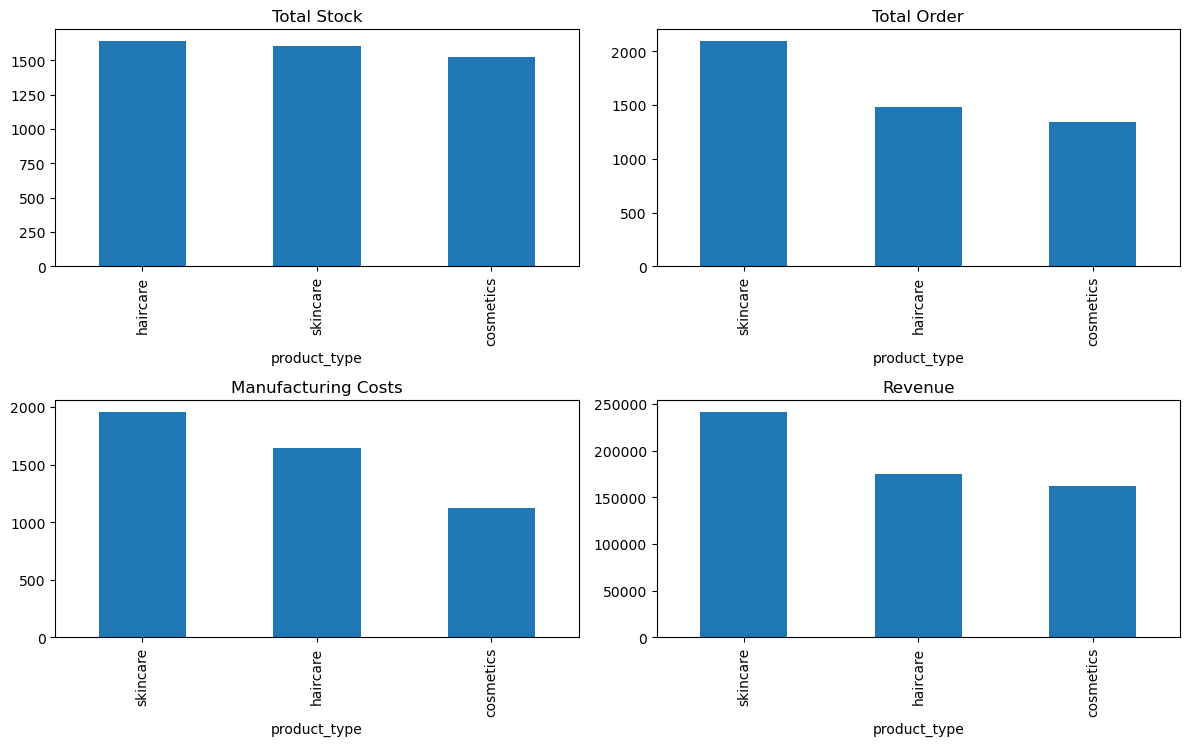

In [124]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Product['stock_levels'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Stock")

plt.subplot(4, 2, 2)
Product['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Product['manufacturing_costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Manufacturing Costs")

plt.subplot(4, 2, 4)
Product['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.tight_layout()
plt.show()

data_Products=df.groupby(['product_type'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', 
                                                                                                                        ascending= False)
px.pie(data_Products, values='number_of_products_sold', names= 'product_type' , title= 'Total Number of Products Sold', color='product_type', 
       color_discrete_map={'cosmetics':'skyblue', 'haircare':'navajowhite', 'skincare':'lawngreen'})

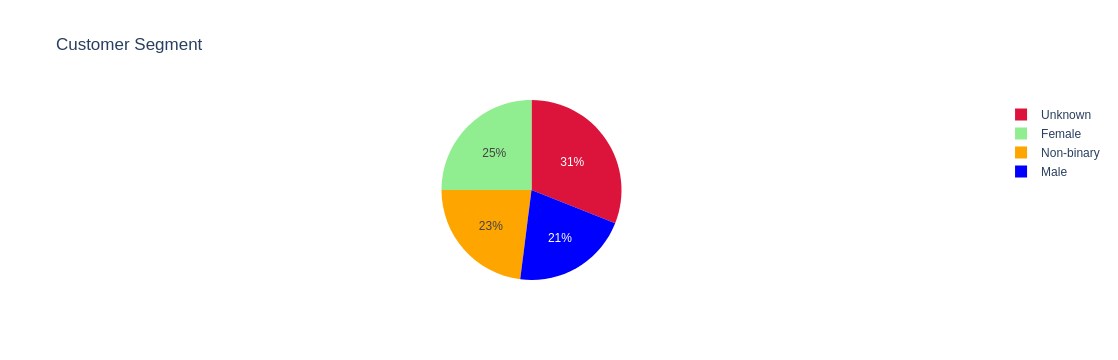

In [125]:
data_Customers=df.groupby(['customer_demographics'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Customers, values='number_of_products_sold', names= 'customer_demographics' , title= 'Customer Segment', 
       color='customer_demographics', color_discrete_map={'Female':'lightgreen', 'Male':'blue', 'Non-binary':'orange', 'Unknown':'crimson'})


In [126]:
Customer_Segment_by_Products= df.groupby(["customer_demographics","product_type"])["sku"].count().reset_index()
Customer_Segment_by_Products

,customer_demographics,product_type,sku
0,Female,cosmetics,10
1,Female,haircare,2
2,Female,skincare,13
3,Male,cosmetics,4
4,Male,haircare,10
5,Male,skincare,7
6,Non-binary,cosmetics,5
7,Non-binary,haircare,7
8,Non-binary,skincare,11
9,Unknown,cosmetics,7


In [127]:
bar_Customer_Segment_by_Products = px.bar(Customer_Segment_by_Products, x='customer_demographics', y='sku', \
    title='Customer Segment by Products',color='product_type')
bar_Customer_Segment_by_Products.show()

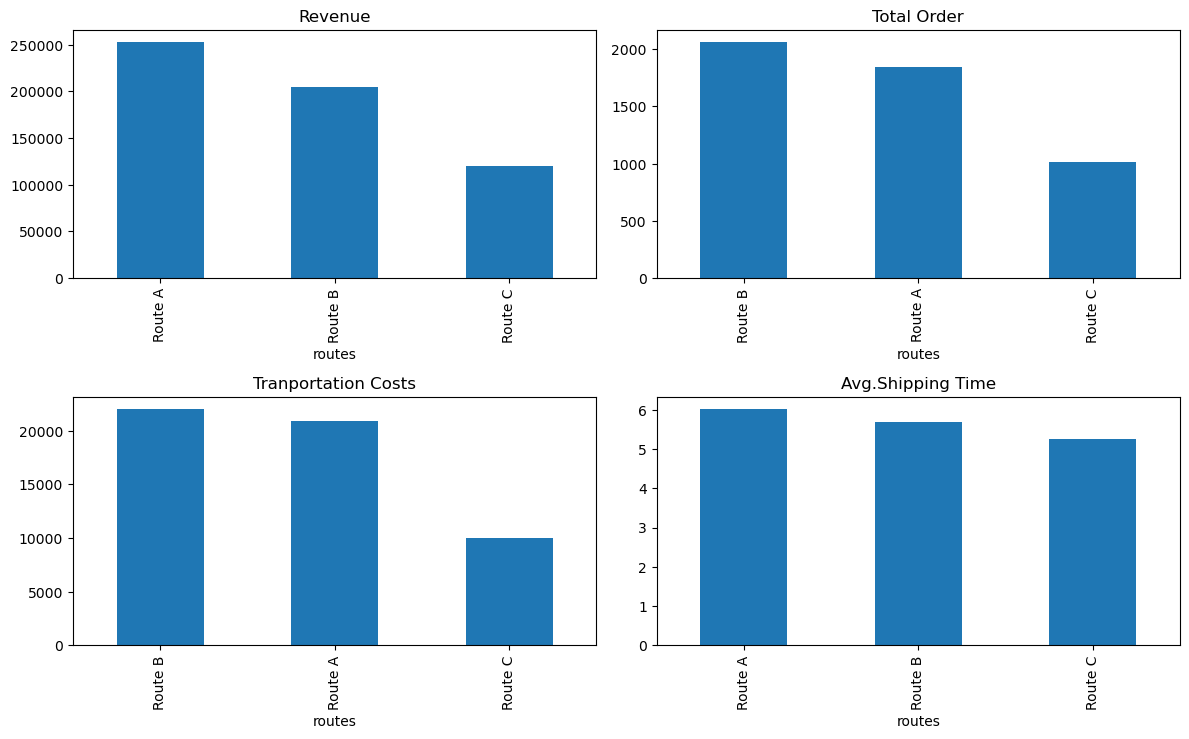

In [128]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Route['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Route['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Route['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Route['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg.Shipping Time")

plt.tight_layout()
plt.show()


data_Routes=df.groupby(['routes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Routes, values='number_of_products_sold', names= 'routes' , title= 'Routes', 
       color='routes',
             color_discrete_map={'Route A':'purple',
                                 'Route B':'lime',
                                 'Route C':'bisque'})

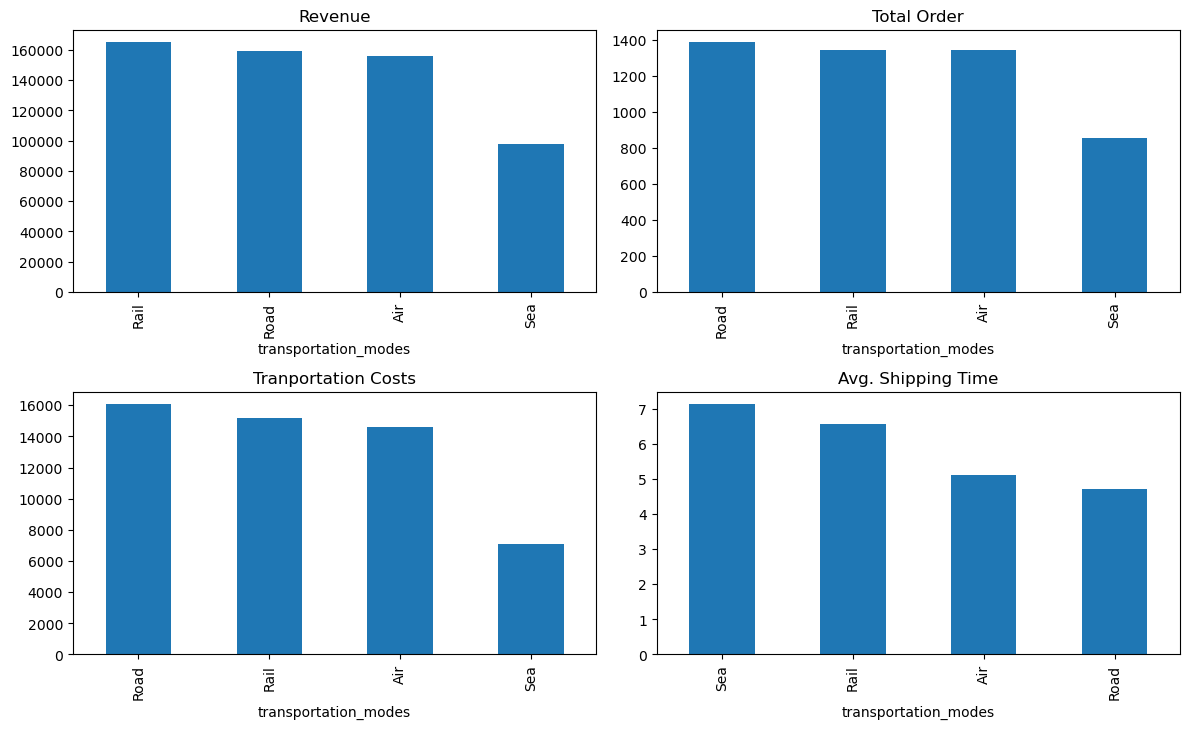

In [129]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Transportation['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Transportation['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Transportation['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Transportation['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg. Shipping Time")

plt.tight_layout()
plt.show()



data_Transportation=df.groupby(['transportation_modes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Transportation, values='number_of_products_sold', names= 'transportation_modes' , title= 'Transportation Modes', 
       color='transportation_modes',
             color_discrete_map={'Air':'deepskyblue',
                                 'Rail':'burlywood',
                                 'Road':'yellowgreen',
                              'Sea':'aquamarine'})


In [130]:
Routes_by_Transportation= df.groupby(["routes","transportation_modes"])["sku"].count().reset_index()
Routes_by_Transportation


,routes,transportation_modes,sku
0,Route A,Air,11
1,Route A,Rail,14
2,Route A,Road,11
3,Route A,Sea,7
4,Route B,Air,7
5,Route B,Rail,11
6,Route B,Road,13
7,Route B,Sea,6
8,Route C,Air,8
9,Route C,Rail,3


In [131]:
bar_Routes_by_Transportation = px.bar(Routes_by_Transportation, x='routes', y='sku', \
    title='Routes_by_Transportation Modes',color='transportation_modes')
bar_Routes_by_Transportation.show()

In [132]:
train_df = dc.copy()

In [133]:
train_df['lead_times']=train_df['lead_times'].astype(int)
train_df['shipping_times']= train_df['shipping_times'].astype(int)
train_df['lead_time']= train_df['lead_time'].astype(int)
train_df['manufacturing_lead_time']= train_df['manufacturing_lead_time'].astype(int)


In [134]:
X=train_df[[ 'sku', 'price', 'revenue_generated', 'lead_times', 'shipping_times', 'shipping_costs','lead_time', 'production_volumes', 
            'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'routes', 'costs']]

Y=train_df[['stock_levels']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [135]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [137]:
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"R-squared: {r2}")
print(mae)

R-squared: 0.17137875821294113
25.578324871869746
